<a href="https://colab.research.google.com/github/AlanOG1994/Chatbot/blob/main/datascience_limpieza_analisisdatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para poder usar los archivos del proyecto, subimos la carpeta comprimida diamonds.zip donde de encuentran los archivos deseados.

In [ ]:
!unzip -q /content/diamonds.zip -d /content

replace /content/diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

importamos las librearias de mejor uso, cargamos los datos y concatanemas para tener nuestro data frame completo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('/content/diamonds.csv')
df2=pd.read_csv('/content/coords_diamonds.csv')

df=pd.concat([df1, df2['latitude'],df2['longitude ']], axis=1)
df=df.drop(['Unnamed: 0'],1)
df.head()

<ipython-input-10-5359155977a4>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['Unnamed: 0'],1)


,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.8813889,-83.093056
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.4150000,-111.548889
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,40.1672222,-105.101389
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.3711111,-85.583056
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.5394444,-121.745000


Veamos las variables numericas y categoricas donde podemos observar 4 variables categoricas y las demas numericas, ademas podemos observar que varias categorias tienen elementos faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53930 non-null  float64
 1   cut         53930 non-null  object 
 2   color       53930 non-null  object 
 3   clarity     53930 non-null  object 
 4   depth       50968 non-null  float64
 5   table       53930 non-null  float64
 6   price       53930 non-null  int64  
 7   x           52840 non-null  float64
 8   y           53345 non-null  float64
 9   z           53930 non-null  float64
 10  latitude    53930 non-null  object 
 11  longitude   53930 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.9+ MB


Empezando  con la limpieza de datos, eliminamos los  datos faltantes y de esta manera se reduce el dataframe.

In [ ]:
df.dropna(inplace=True)
df['latitude'] = pd.to_numeric(df['latitude'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50967 entries, 0 to 53928
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       50967 non-null  float64
 1   cut         50967 non-null  object 
 2   color       50967 non-null  object 
 3   clarity     50967 non-null  object 
 4   depth       50967 non-null  float64
 5   table       50967 non-null  float64
 6   price       50967 non-null  int64  
 7   x           50967 non-null  float64
 8   y           50967 non-null  float64
 9   z           50967 non-null  float64
 10  latitude    50967 non-null  float64
 11  longitude   50967 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 5.1+ MB


A continuacion analizamos las variables categoricas, esto con el fin de que tengan 2 o mas subnivel, en caso contario no aportarian oinformacion y eliminariamos la columna.

In [ ]:
columns_cat=['cut','color','clarity']
for col in columns_cat:
  print(f'Columna {col}:{df[col].nunique()} Subniveles')

Columna cut:25 Subniveles
Columna color:26 Subniveles
Columna clarity:30 Subniveles


como podemos observar las columnas categoricas aportan informacion variada, de tal modo se mantienen.

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z,latitude,longitude
count,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000
mean,0.797744,61.749369,57.457335,3930.343693,5.729340,5.732569,3.537664,38.152178,-86.715614
std,0.474128,1.432907,2.232251,3989.128184,1.127825,1.142267,0.709445,10.473208,39.738135
min,0.200000,43.000000,43.000000,326.000000,-6.370000,-5.320000,-4.060000,-82.862752,-173.985008
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000,34.151111,-112.073333
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.520000,39.466667,-87.900556
75%,1.040000,62.500000,59.000000,5315.000000,6.540000,6.540000,4.030000,42.814444,-78.694167
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000,178.017649


Analizamos las variables numericas, en este caso si son iguales no aportarian informacion, esto analizar mediante la desviacion estandar la cual mide la dispersion de los datos, en este caso la desviacion estadar es diferente de 0 para cada variable, por lo que cada variable aporta informacion.

In [ ]:
print(f'El tamaño del set antes de eliminar filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'El tamaño del set despues de eliminar filas repetidas: {df.shape}')

El tamaño del set antes de eliminar filas repetidas: (50967, 12)
El tamaño del set despues de eliminar filas repetidas: (50967, 12)


limpiamos nuestro data set de posibles filas repetidas

El siguiente paso es eliminar los outliers de nuestro data ser usando la como herramienta las conocidas graficas de bigote para identificar facilmente los outliner de las variables numericas.

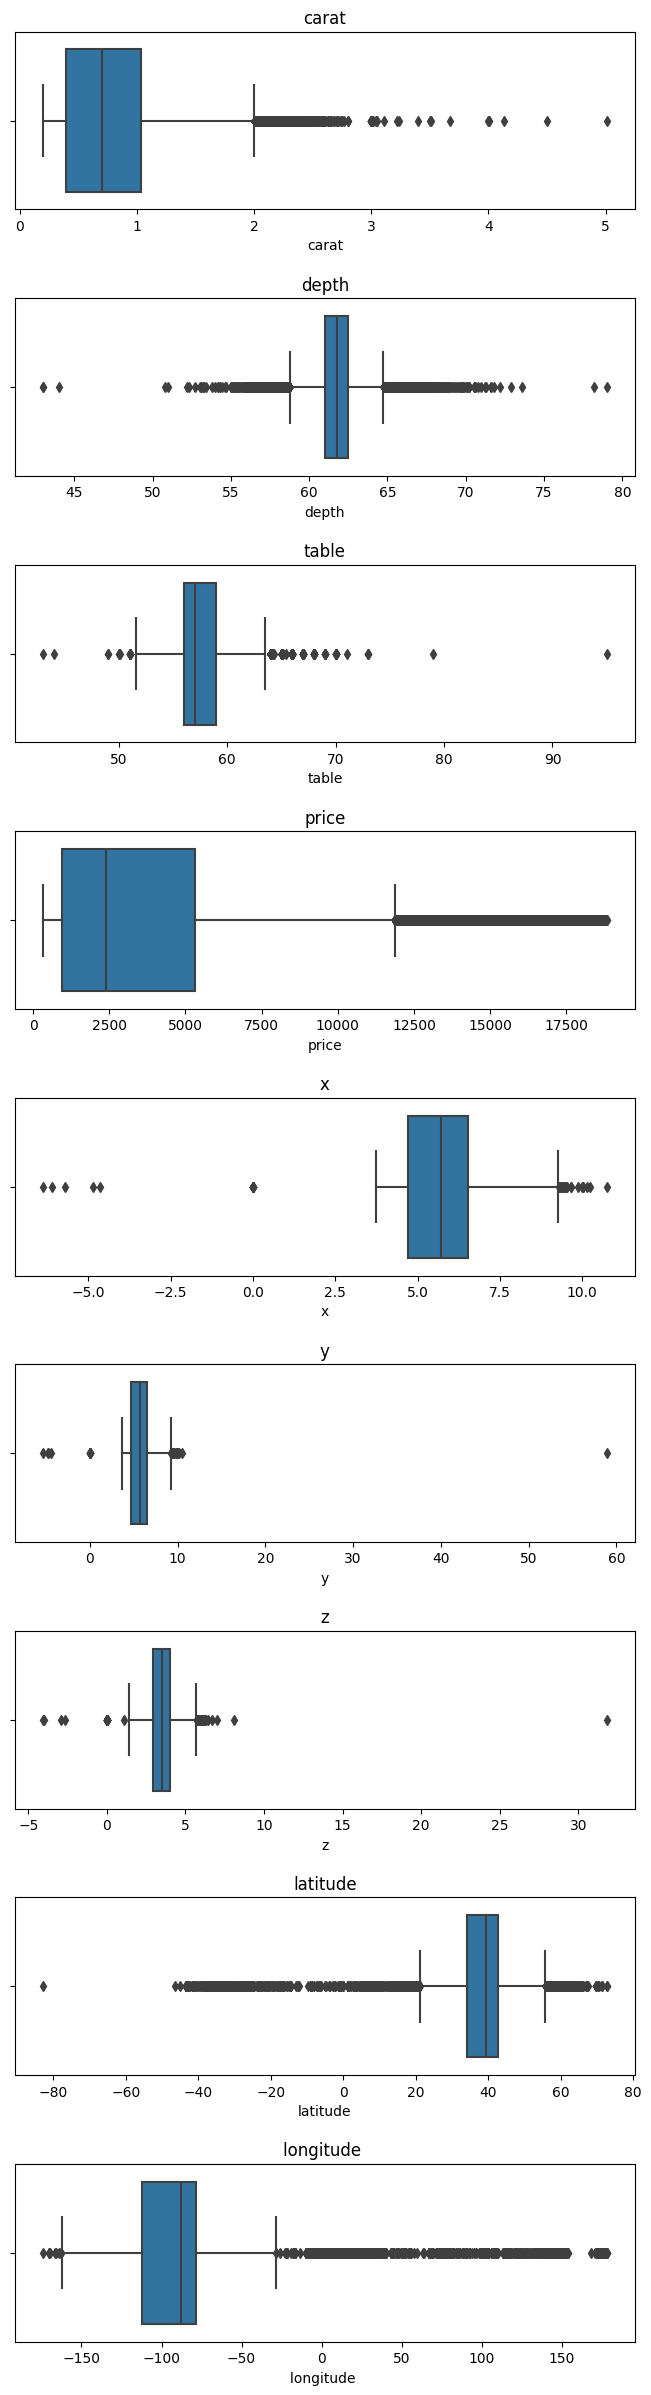

In [ ]:
columns_num=['carat','depth','table','price','x','y','z','latitude','longitude ']
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_num):
  sns.boxplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante

**Observaciones:**

- "table": hay outliers mayores a 80
- "x": hay outliers menores a 2.5
- "y": hay outliers mayores a 20 y menores a 2
- "z": hay outliers mayores a 10 y menores a 0
- "latitude": hay outliers menores a -60

Por lo tanto se decide eliminar estos outliers


In [ ]:
# Eliminar filas con "table">80
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['table']<=80]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (50967, 12)
Tamaño del set después de eliminar registros de edad: (50966, 12)


In [ ]:
# Eliminar filas con "x"<2.5
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['x']>=2.5]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (50966, 12)
Tamaño del set después de eliminar registros de edad: (50953, 12)


In [ ]:
# Eliminar filas con "y">20
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['y']<=20]
df = df[df['y']>=2]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (50953, 12)
Tamaño del set después de eliminar registros de edad: (50948, 12)


In [ ]:
# Eliminar filas con "z">10
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['z']<=10]
df = df[df['z']>=0]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (50948, 12)
Tamaño del set después de eliminar registros de edad: (50943, 12)


In [ ]:
# Eliminar filas con "latitude"<-60
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['latitude']>=-60]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (50943, 12)
Tamaño del set después de eliminar registros de edad: (50942, 12)


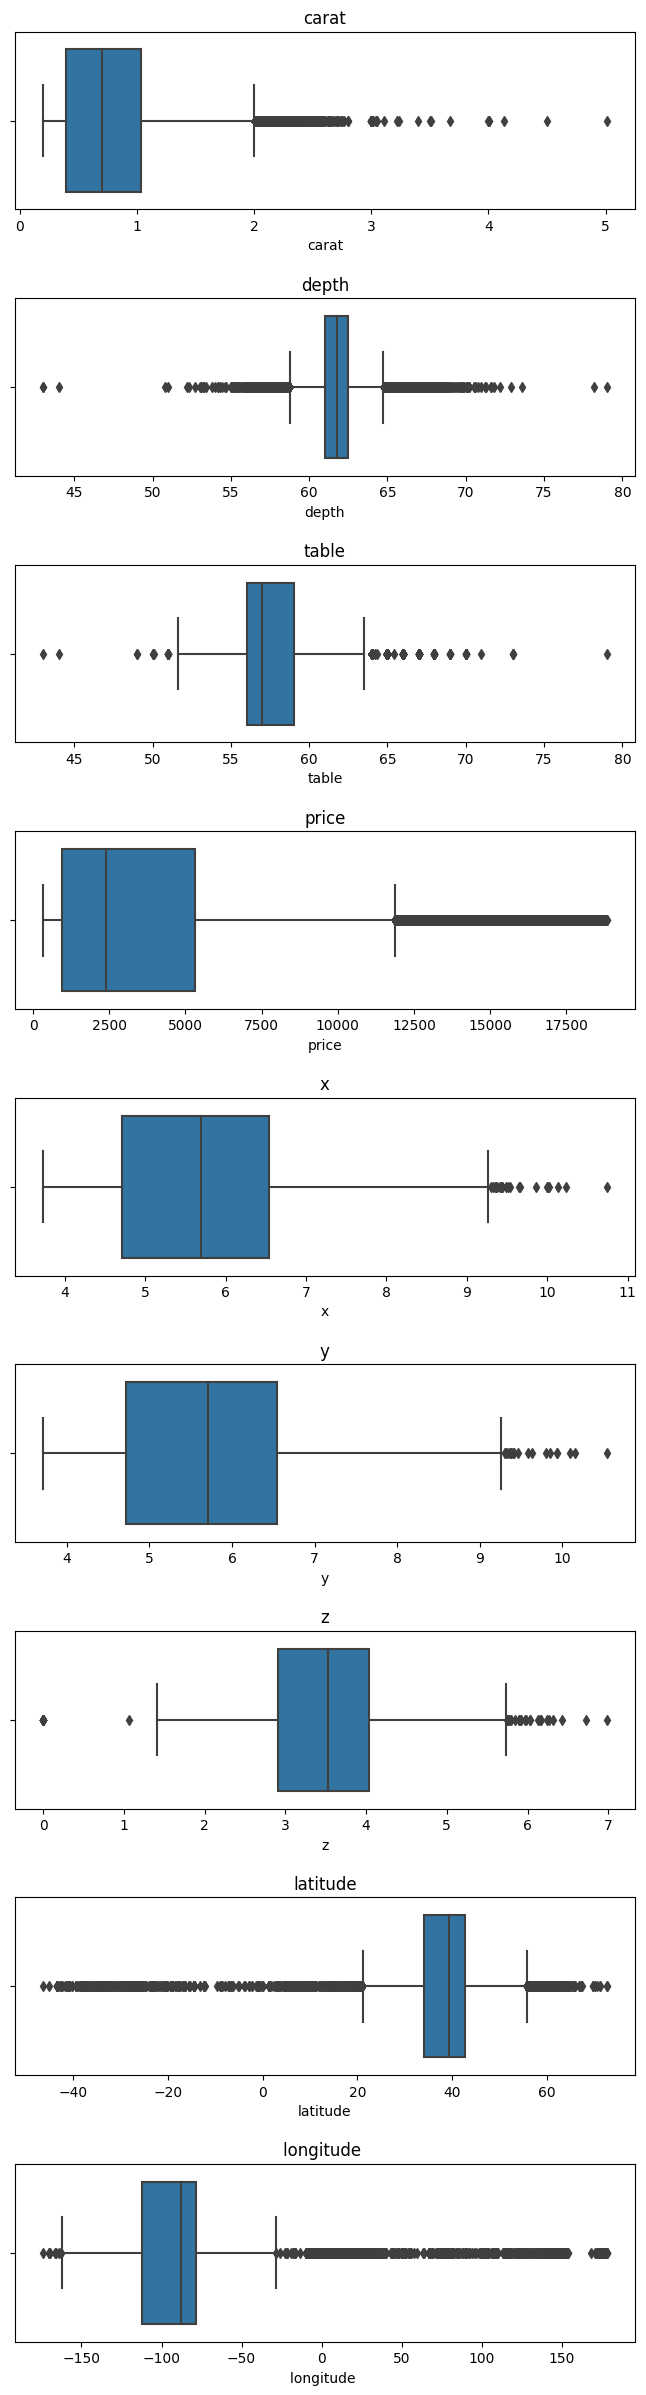

In [ ]:
columns_num=['carat','depth','table','price','x','y','z','latitude','longitude ']
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_num):
  sns.boxplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)

**Observaciones**

Para las variables numericas graficamente tienen algunos outliers, pero con la limpieza estan menos dispersos, para el objetivo de este proyecto se matienen estos valores de las variables numericas, esto debido al poco conocimiento de cada variable en especifico.

EL siguiente paso es analizar las variables categoricas para realizar la limpieza

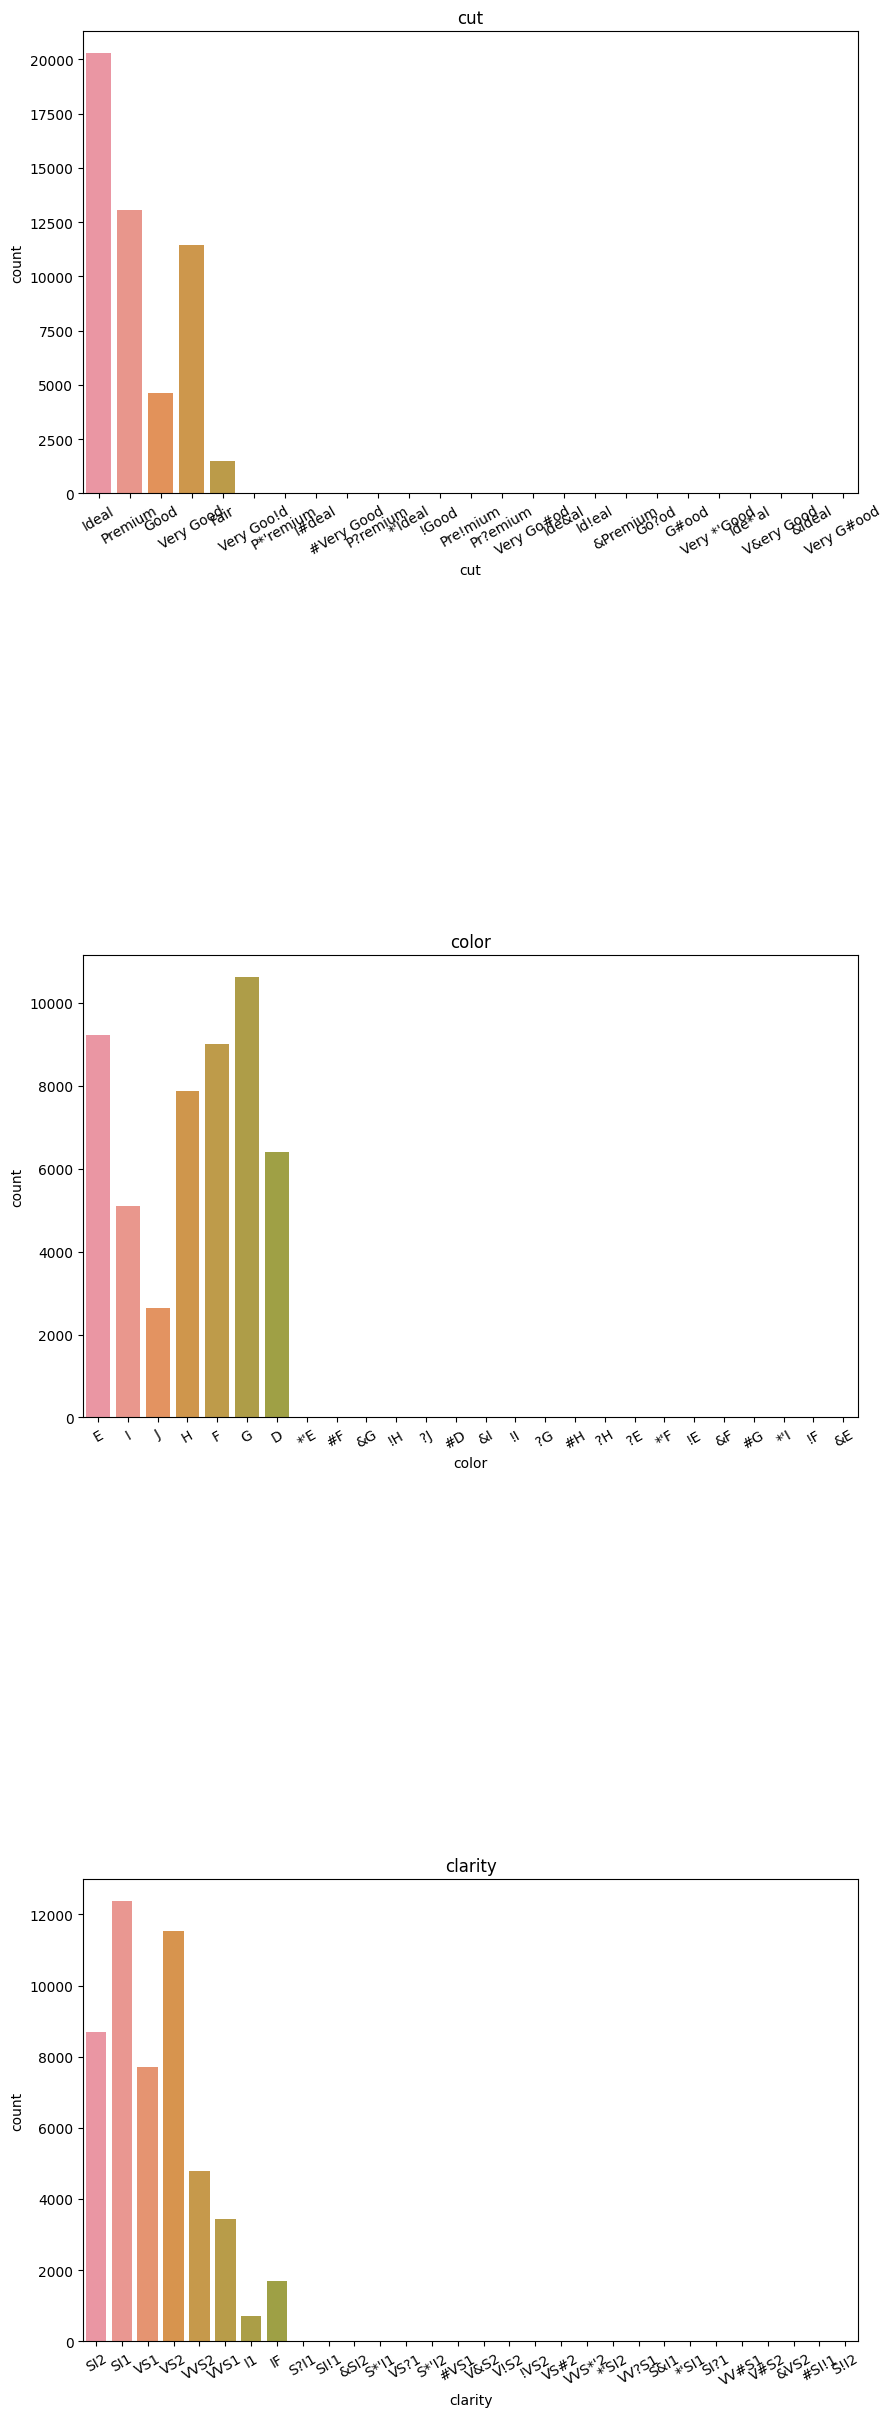

In [ ]:
# Graficar los subniveles de cada variable categórica
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columns_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Las variable categoricas contienen caracteres especiales por que se realiza la limpieza de los elementos de cada variable mediante expresiones regulares

In [ ]:

print(df['color'].unique())
df['color'] = df['color'].str.replace(r'\W','')
print(df['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


<ipython-input-25-c7bc5b21b1d7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['color'] = df['color'].str.replace(r'\W','')


In [ ]:
print(df['cut'].unique())
df['cut'] = df['cut'].str.replace(r'\W','')
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Id!eal' '&Premium' 'Go?od' 'G#ood' "Very *'Good"
 "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']
['Ideal' 'Premium' 'Good' 'VeryGood' 'Fair']


<ipython-input-26-25d5466fcd5f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cut'] = df['cut'].str.replace(r'\W','')


In [ ]:
print(df['clarity'].unique())
df['clarity'] = df['clarity'].str.replace(r'\W','')
print(df['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&SI2'
 "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '&VS2' '#SI!1'
 'S!I2']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<ipython-input-27-91e92a542f52>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clarity'] = df['clarity'].str.replace(r'\W','')


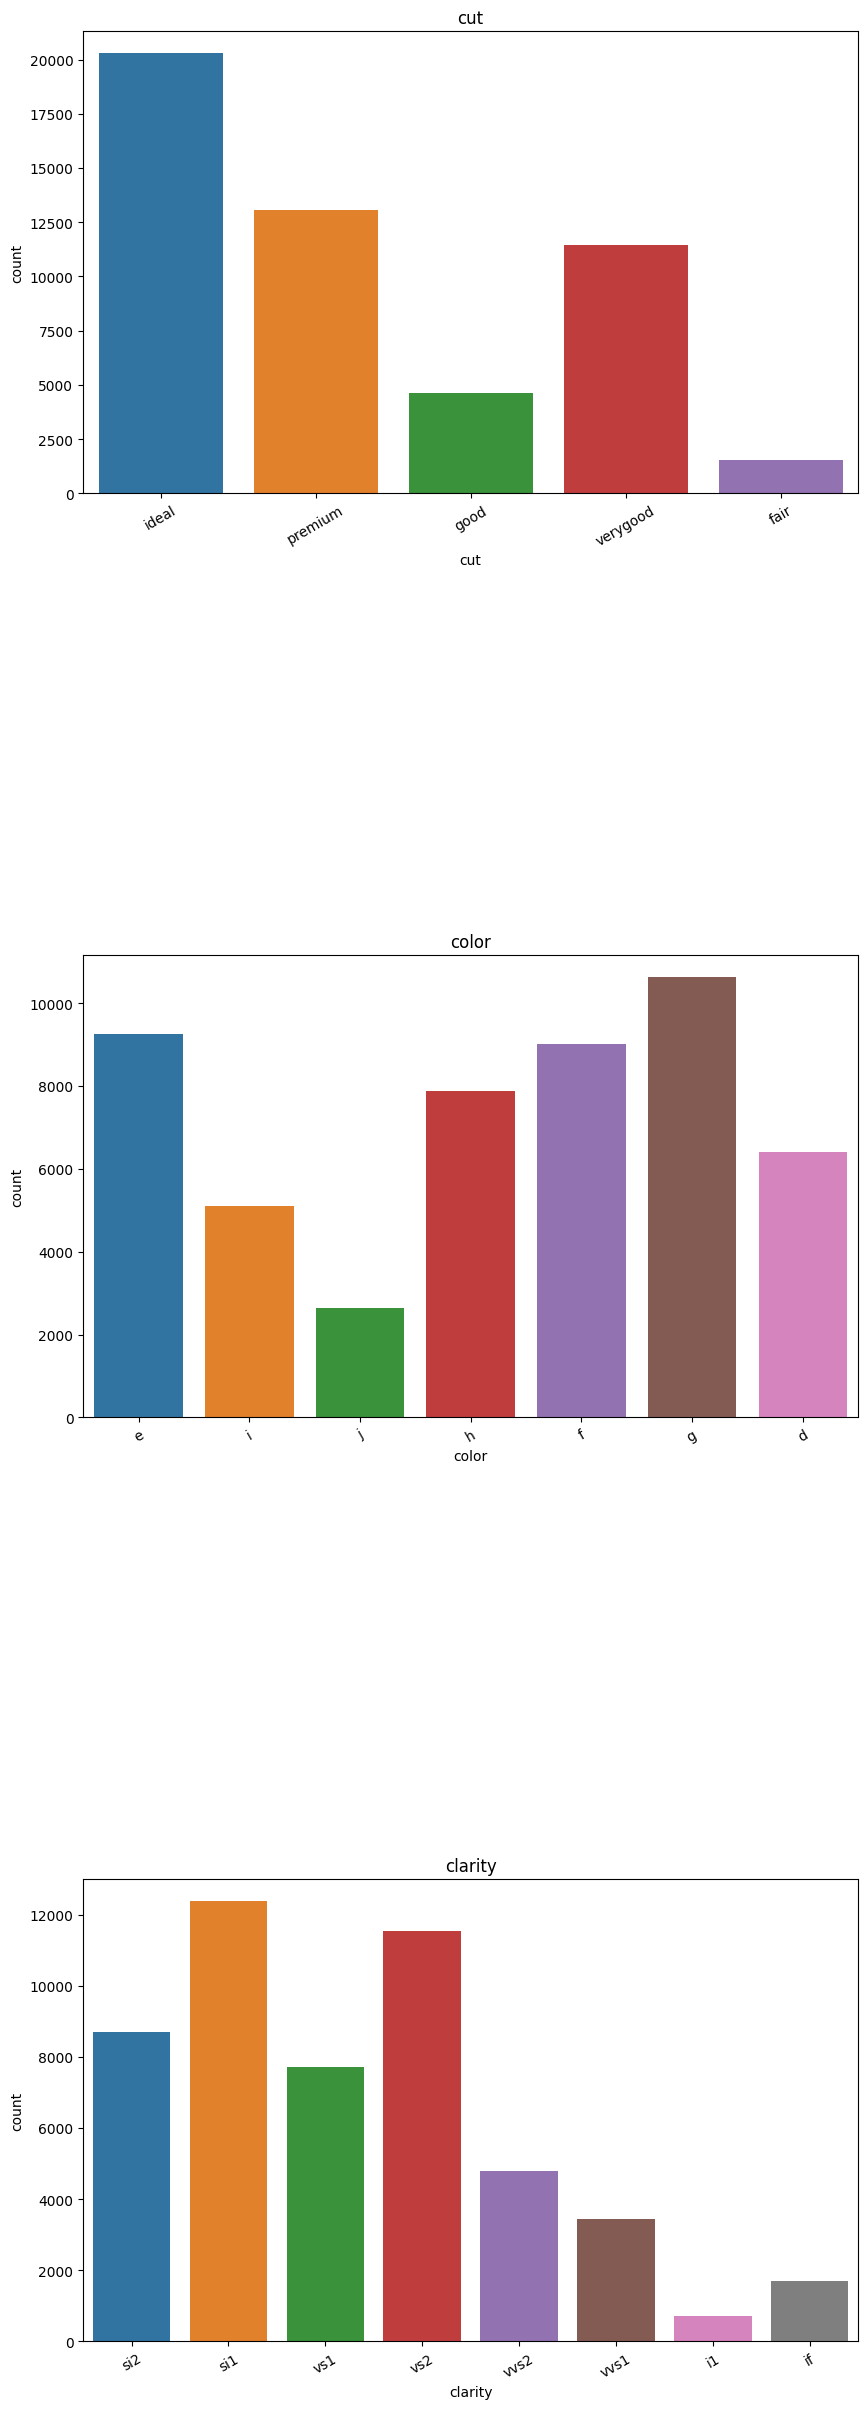

In [ ]:
# Graficar los subniveles de cada variable categórica
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for column in df.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in columns_cat:
        df[column] = df[column].str.lower()


for i, col in enumerate(columns_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observaciones **

En este punto nuestro data set esta limpio y ordenado, por lo que iniciamos el analisis EDA

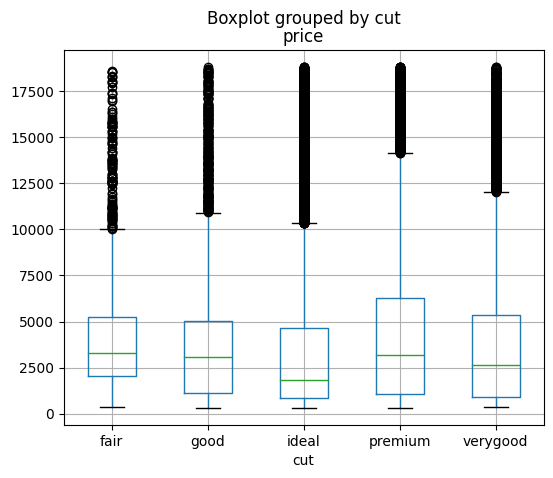

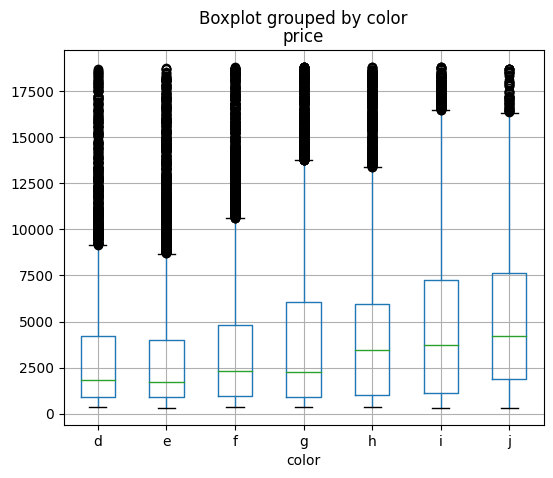

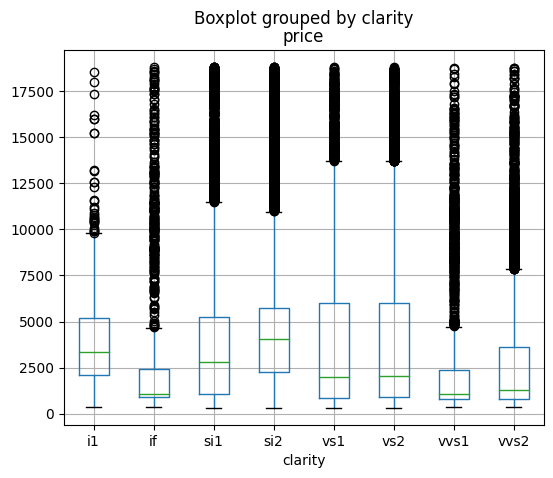

In [ ]:
#df.boxplot('price','cut',grid=True,figsize=(6,5))

for i, col in enumerate(columns_cat):
  df.boxplot('price',col,grid=True,figsize=(6,5))

**Observaciones**

El objetivo era realizar una relacion entre las variables categoricas de 'cut', 'color' y 'clarity'. Las variables de color presentan apenas una pequeña diferencia entre los precios la cual es insignificante. Se esperaba una variacion significativa de los valores 'premium' y 'good', las medias de sus precios son muy similiares por lo que no aportan informacion significativa para el problema en si.



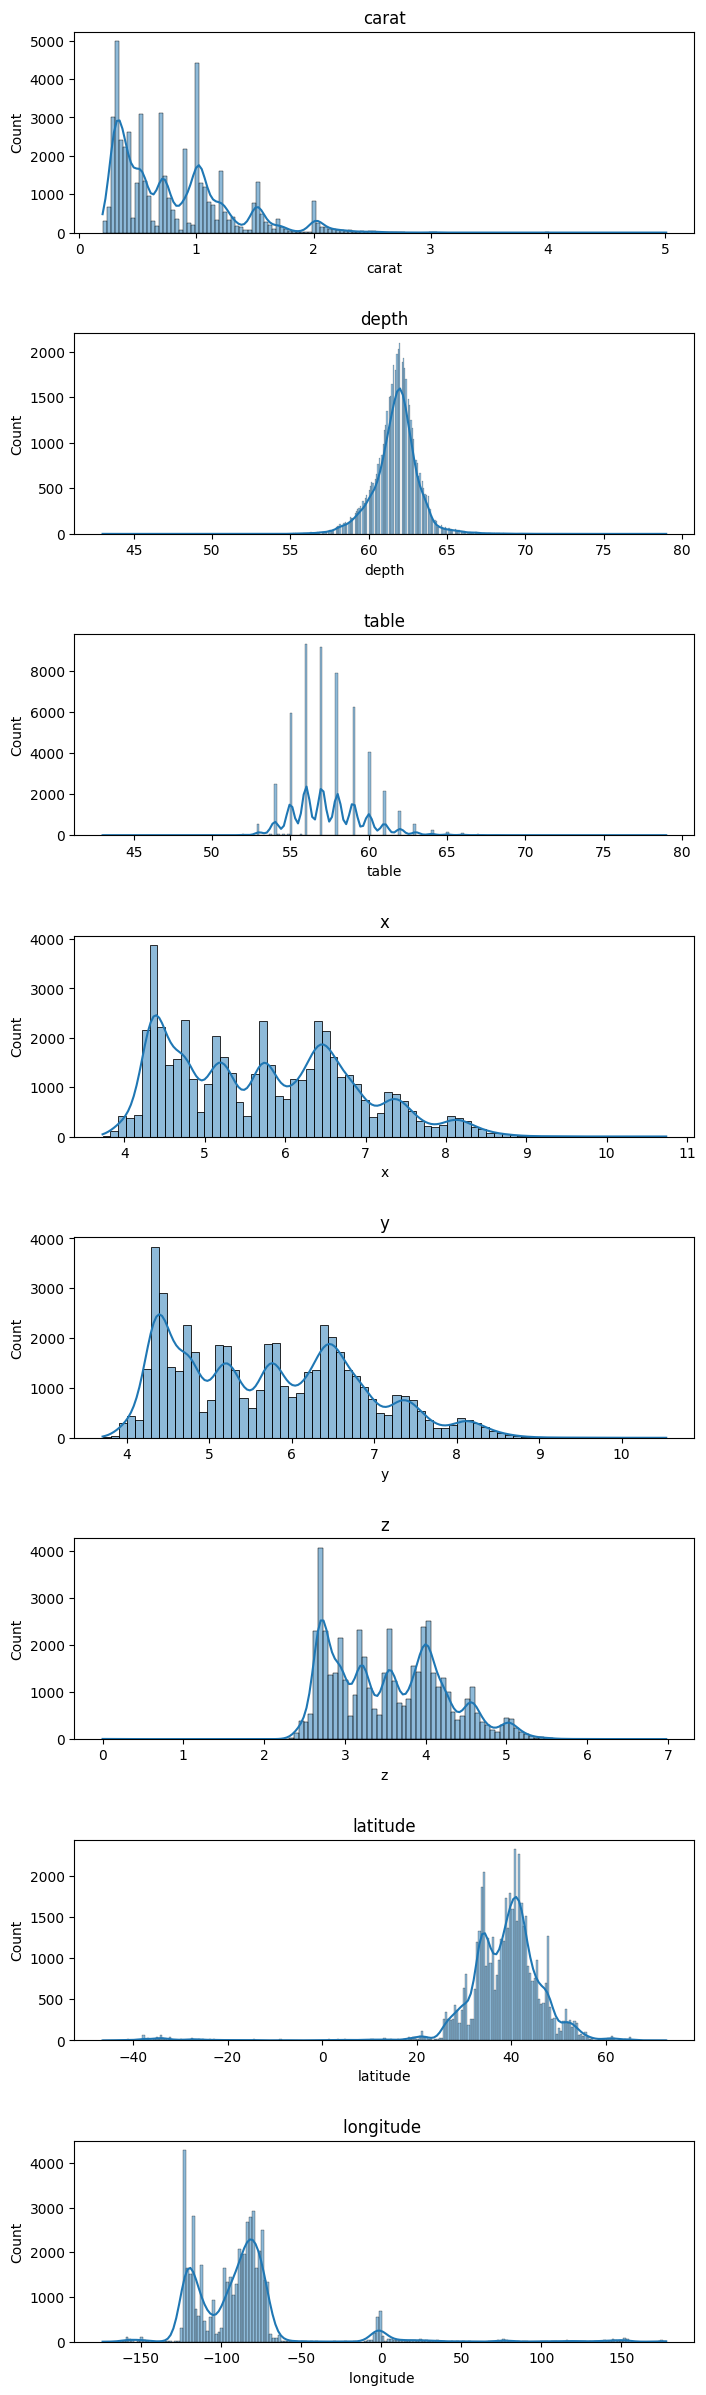

In [ ]:
columns_num=['carat','depth','table','x','y','z','latitude','longitude ']
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columns_num):
    sns.histplot(x=col, data=df, ax=ax[i], kde = True)
    ax[i].set_title(col)

Se realiza una pequeña observacion de la distribucion de los datos numericos con el fin de encontar una relacion con el precio.

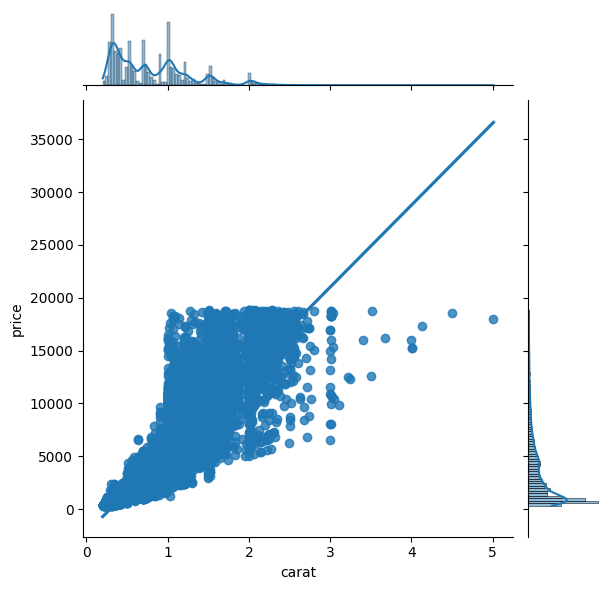

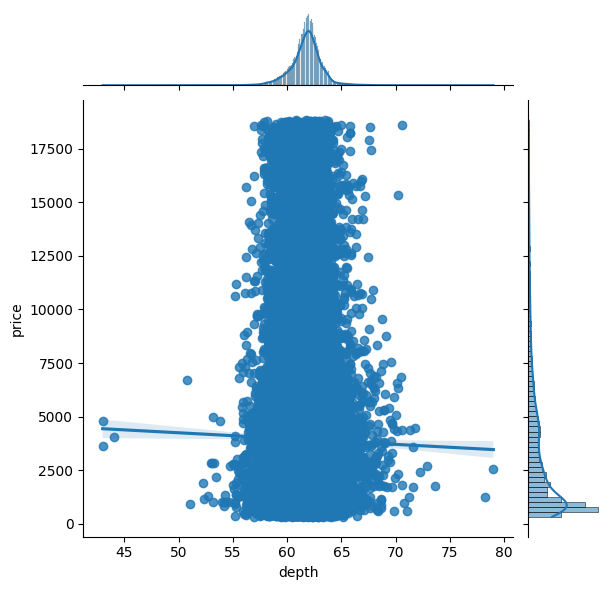

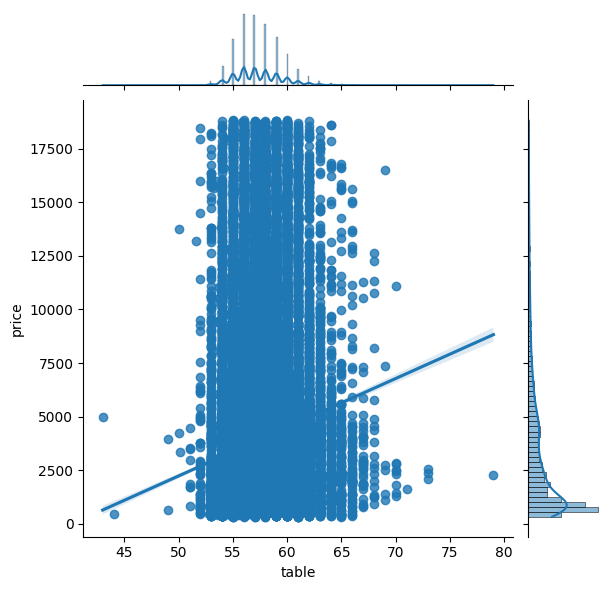

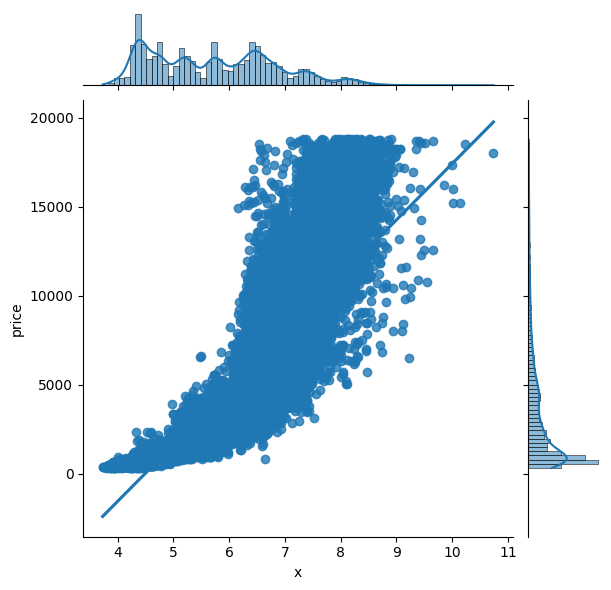

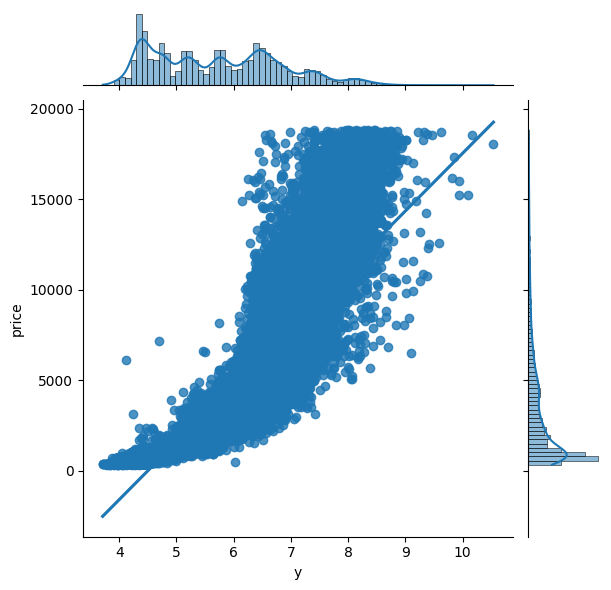

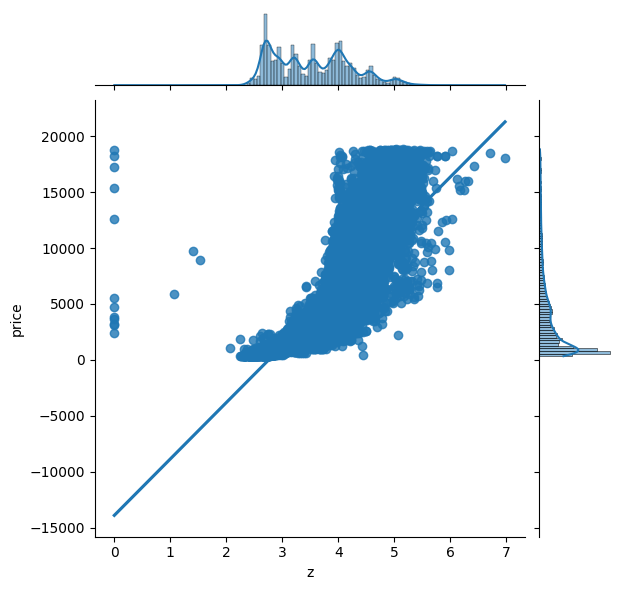

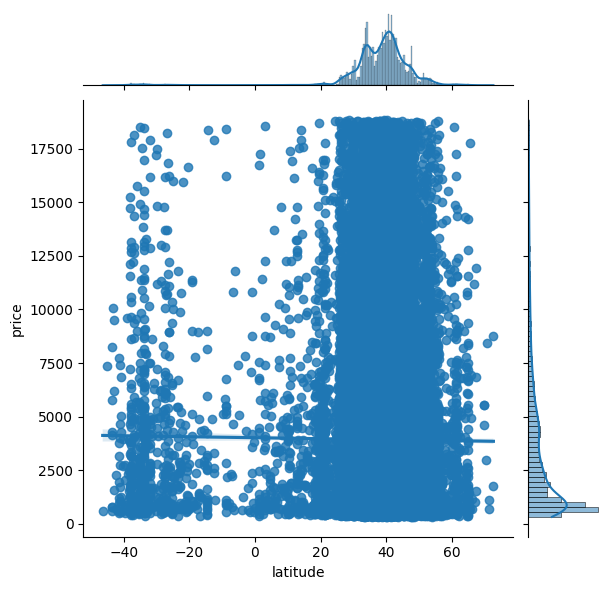

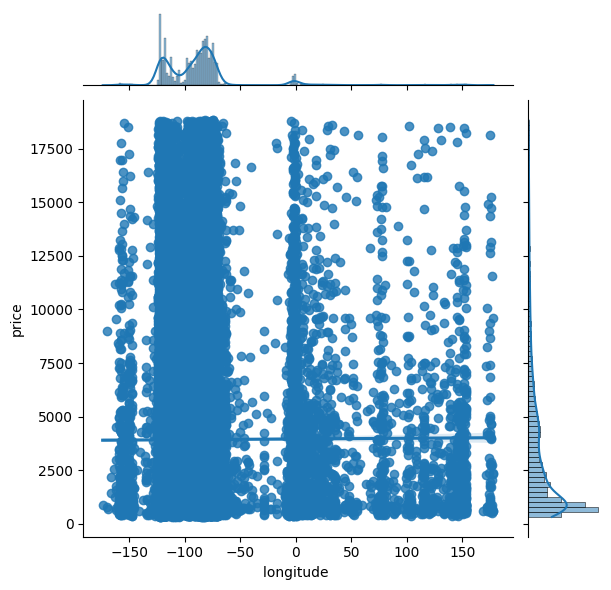

In [ ]:
for i, col in enumerate(columns_num):
    sns.jointplot(x=col,y='price',data=df,kind='reg')



**Observaciones**

Las variables numericas por separado no tienen una relacion visualmente directa con el precio. Por lo que se propone un algoritmo de predccion para este reto.

como primer paso tranformaremos las variables categoricas de nuestro data set limpio  a varibles numericas mediante el siguiente codigo.

In [ ]:
df2=df
columns_cat=['cut','color','clarity']
cut_={'ideal':0,'premium':1,'good':2,'verygood':3, 'fair':4}
df2['cut']=df2['cut'].map(cut_)
color_={'e':0,'i':1,'j':2, 'h':3,'f':4,'g':5,'d':6}
df2['color']=df2['color'].map(color_)
clar_={'si2':0, 'si1':1, 'vs1':2, 'vs2':3, 'vvs2':4,'vvs1':5,'i1':6,'if':7}
df2['clarity']=df2['clarity'].map(clar_)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43,39.881389,-83.093056
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31,33.415000,-111.548889
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31,40.167222,-105.101389
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63,37.371111,-85.583056
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75,48.539444,-121.745000
...,...,...,...,...,...,...,...,...,...,...,...,...
53924,0.72,1,6,1,62.7,59.0,2757,5.69,5.73,3.58,34.106667,-117.805833
53925,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50,38.581667,-121.493333
53926,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61,32.436381,-111.222442
53927,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56,40.241389,-75.284167


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43,39.881389,-83.093056
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31,33.415000,-111.548889
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31,40.167222,-105.101389
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63,37.371111,-85.583056
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75,48.539444,-121.745000
...,...,...,...,...,...,...,...,...,...,...,...,...
53924,0.72,1,6,1,62.7,59.0,2757,5.69,5.73,3.58,34.106667,-117.805833
53925,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50,38.581667,-121.493333
53926,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61,32.436381,-111.222442
53927,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56,40.241389,-75.284167


El sigueinte paso el leer el data set de los articulos robados y convertir sus variales categoricas a variables numericas como se hizo en el paso anterior.

In [ ]:
ruta = "/content/drive/MyDrive/Datascience/producto_robado.csv"
data_new = pd.read_csv(ruta)
for column in df.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in columns_cat:
        data_new[column] = data_new[column].str.lower()
data_new

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude
0,0.71,good,i,vvs2,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510
1,0.83,ideal,g,vs1,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610
2,0.50,ideal,e,vs2,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673
3,0.39,premium,j,vs1,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300
4,0.32,premium,g,vs1,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020
5,0.90,good,f,si2,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740
6,0.51,ideal,d,vs1,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800
7,1.12,ideal,g,vvs2,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500
8,0.40,ideal,g,vvs2,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300
9,0.36,premium,i,vs2,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080


In [ ]:
columns_cat=['cut','color','clarity']
cut_={'ideal':0, 'premium':1,'good':2,'verygood':3, 'fair':4}
data_new['cut']=data_new['cut'].map(cut_)
color_={'e':0,'i':1,'j':2, 'h':3,'f':4,'g':5,'d':6}
data_new['color']=data_new['color'].map(color_)
clar_={'si2':0, 'si1':1, 'vs1':2, 'vs2':3, 'vvs2':4,'vvs1':5,'i1':6,'if':7}
data_new['clarity']=data_new['clarity'].map(clar_)
data_new

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude
0,0.71,2,1,4,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510
1,0.83,0,5,2,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610
2,0.50,0,0,3,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673
3,0.39,1,2,2,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300
4,0.32,1,5,2,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020
5,0.90,2,4,0,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740
6,0.51,0,6,2,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800
7,1.12,0,5,4,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500
8,0.40,0,5,4,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300
9,0.36,1,1,3,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080


Se observa el data set de los productos robados el los cuales se realizara una prediccion del costo.

Importamos las librerias que se usaran para el entrenamiento de nuesto modelo de aprendizaje automatico.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

El siguiente paso es la separacion de los datos de entrenamiento con los datos de test, ademas, se realizara la  estandarizacion de los datos entrenamiento y tambien los datos de los articulos robados que seran usados para predecir el precio.

In [ ]:
X = df.drop(columns = 'price')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.05)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_predict= scaler.transform(data_new)

**Observacion**(**Muy importante**)

Es muy importante mencionar que debido a las limitantes de poder de computo de mi computadora y de los recursos que me quedan disponibles de colab, el train_size se tomo de 0.05, esto es un valor muy bajo pero debido al gran tamaño del data set me fui obligado a tomar esta medida extrema.

Un train_size  recomendado para entrenar es de train_size = 0.8.

EL siguiente paso es el entrenamiento

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clf.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.008038020456658745


como se puede observar el score es muy bajo esto como se menciono se debe ala pequeña muestra de base de datos que se tomo.

In [ ]:
from sklearn.utils.validation import joblib
joblib.dump(clf,'train.pkl')

['train.pkl']

In [ ]:
mlp=joblib.load('train.pkl')

Despues de entrenar el modelo se guarda dentro este espacio de trabajo con el para no entrenar cada ocasion que este abierto el proyecto.

Con el modelo ya entrenado se procede ala prediciion de los articulos robados.

In [ ]:
predicciones = clf.predict(X_predict)
resul=pd.DataFrame({'Precio_estimadodel robo':predicciones})
resul=pd.concat([data_new, resul], axis=1)
resul


,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude,Precio_estimadodel robo
0,0.71,2,1,4,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510,2925
1,0.83,0,5,2,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610,2877
2,0.50,0,0,3,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673,1712
3,0.39,1,2,2,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300,460
4,0.32,1,5,2,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020,645
5,0.90,2,4,0,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740,4355
6,0.51,0,6,2,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800,2066
7,1.12,0,5,4,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500,8491
8,0.40,0,5,4,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300,1061
9,0.36,1,1,3,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080,658


In [ ]:
print('La suma total estimada del robo es',sum(predicciones))

La suma total estimada del robo es 25250


Como se pude observar la predeccion de costo total ronda en 25250, este dato parece aceptable, sin embargo cabe mencionar que se cuenta con una gran base de datos para entrenar estos valores estimados pueden ser mucho mejor.

El poder de computo para grandes bases de datos es muy importante